In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
df_train=pd.read_csv("tech_team_train.csv")
df_test=pd.read_csv("tech_team_test.csv")

In [3]:
df_train.drop(df_train.index[(df_train["Quantity"]<0)],axis=0,inplace=True)

In [4]:
df_train.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df_train=df_train[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country']].drop_duplicates()

In [7]:
df_train.shape

(194357, 8)

In [8]:
df_train.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,194357.000000,194357.000000,194357.000000,194357.000000,194357.000000,194357.000000,194357.000000
mean,9714.469399,1571.610058,2024.313711,13.020920,3.075944,15290.465535,32.831388
std,5379.374553,842.901993,1091.076677,175.591543,16.265359,1715.377129,6.731850
min,0.000000,0.000000,0.000000,1.000000,0.000000,12346.000000,0.000000
25%,4951.000000,936.000000,1141.000000,2.000000,1.250000,13955.000000,35.000000
50%,10106.000000,1522.000000,1987.000000,6.000000,1.950000,15152.000000,35.000000
75%,14408.000000,2106.000000,2949.000000,12.000000,3.750000,16800.000000,35.000000
max,18535.000000,3683.000000,3895.000000,74215.000000,4161.060000,18287.000000,36.000000


In [9]:
df_train.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
# #EDA using pandas-profiling
# profile = ProfileReport(pd.read_csv('tech_team_train.csv'), explorative=True)
# #Saving results to a HTML file
# profile.to_file("output.html")

In [11]:
# import dtale
# import pandas as pd

# dtale.show(pd.read_csv("tech_team_train.csv"))

In [12]:
df_train.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [13]:
df_train['Time']=df_train['InvoiceDate'].apply(lambda x : x.split()[1])

In [14]:
df_train['InvoiceDate']=df_train['InvoiceDate'].apply(lambda x : x.split()[0])

In [15]:
df_train.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time
0,6141,1583,144,3,2011-05-06,3.75,14056.0,35,16:54:00
1,6349,1300,3682,6,2011-05-11,1.95,13098.0,35,07:35:00
2,16783,2178,1939,4,2011-11-20,5.95,15044.0,35,13:20:00
3,16971,2115,2983,1,2011-11-22,0.83,15525.0,35,12:07:00
4,6080,1210,2886,12,2011-05-06,1.65,13952.0,35,09:00:00


In [16]:
df_train['Time']=df_train['Time'].apply(lambda x : x.split(":")[0])

In [17]:
df_train['Time']=df_train['Time'].astype('int')

In [18]:
df_train['Revenue']=df_train['Quantity']*df_train['UnitPrice']

In [19]:
top_twty_customer=df_train.groupby(['Country','CustomerID'])['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

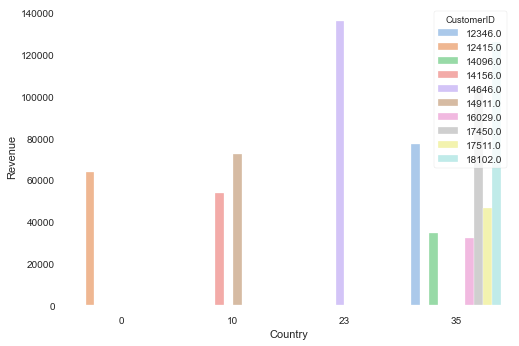

In [20]:
import seaborn as sns
sns.barplot(top_twty_customer['Country'],
            top_twty_customer.Revenue,
            hue=top_twty_customer.CustomerID,
            palette='pastel')

In [21]:
top_10_revenue=df_train.groupby(['Country'])['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

In [22]:
top_10_revenue

,Country,Revenue
0,35,3490591.584
1,23,139087.610
2,10,127881.380
3,14,114135.600
4,13,106396.000
5,0,69788.590
6,30,33668.120
7,32,26001.300
8,3,19892.640
9,24,18147.650


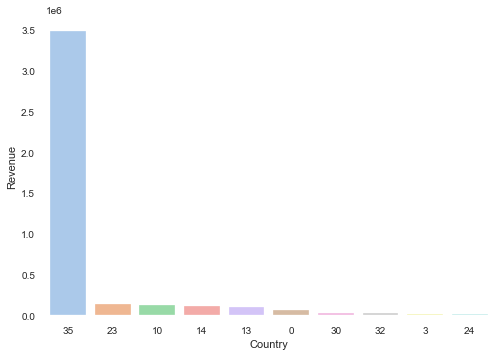

In [23]:
sns.barplot(x='Country',
            y="Revenue", data=top_10_revenue,
            palette='pastel',
            order=top_10_revenue.sort_values('Revenue',ascending = False).Country)

In [24]:
quantity_sold_hourly=df_train.groupby(['Time'])['Quantity'].sum().sort_values(ascending=False).reset_index()

In [25]:
##peak hours in a day

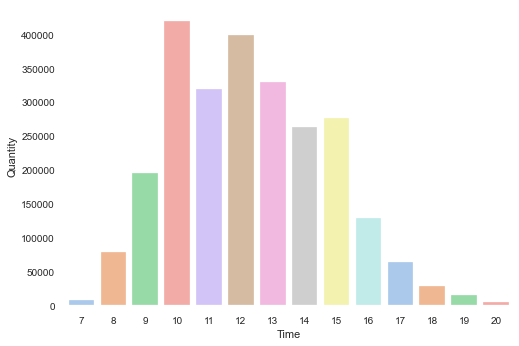

In [26]:
sns.barplot(x='Time',
            y="Quantity", data=quantity_sold_hourly,
            palette='pastel')

In [27]:
## list of product which are for free

In [28]:
free_items=df_train[df_train['UnitPrice']==0]

In [29]:
free=free_items.groupby(['Country'])['Quantity'].sum().reset_index()

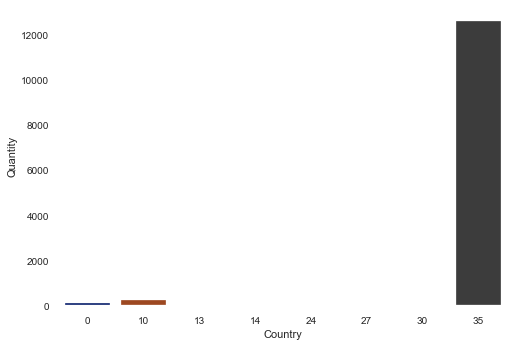

In [30]:
sns.barplot(x='Country',
            y="Quantity", data=free,
            palette='dark')

In [31]:
df_train['InvoiceNo']

0          6141
1          6349
2         16783
3         16971
4          6080
          ...  
199994    10369
199996     9942
199997    15999
199998     3833
199999    13431
Name: InvoiceNo, Length: 194357, dtype: int64

In [32]:
import datetime 
day_name= {0:'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6:'Sunday'}
df_train['day'] = df_train['InvoiceDate'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').weekday())

In [33]:
df_train['day']=df_train['day'].map(day_name)

In [34]:
df_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Revenue,day
0,6141,1583,144,3,2011-05-06,3.75,14056.0,35,16,11.25,Friday
1,6349,1300,3682,6,2011-05-11,1.95,13098.0,35,7,11.70,Wednesday
2,16783,2178,1939,4,2011-11-20,5.95,15044.0,35,13,23.80,Sunday
3,16971,2115,2983,1,2011-11-22,0.83,15525.0,35,12,0.83,Tuesday
4,6080,1210,2886,12,2011-05-06,1.65,13952.0,35,9,19.80,Friday
...,...,...,...,...,...,...,...,...,...,...,...
199994,10369,1347,383,24,2011-08-05,1.25,13435.0,35,11,30.00,Friday
199996,9942,2075,3500,6,2011-07-27,2.08,12397.0,3,14,12.48,Wednesday
199997,15999,856,318,2,2011-11-11,3.75,17295.0,35,10,7.50,Friday
199998,3833,441,2424,1,2011-03-11,0.85,15311.0,35,13,0.85,Friday


In [35]:
df_train['InvoiceDate']

0         2011-05-06
1         2011-05-11
2         2011-11-20
3         2011-11-22
4         2011-05-06
             ...    
199994    2011-08-05
199996    2011-07-27
199997    2011-11-11
199998    2011-03-11
199999    2011-10-05
Name: InvoiceDate, Length: 194357, dtype: object

In [36]:
df_day=df_train.groupby(['day','Time'])['Quantity'].sum().sort_values(ascending=False).reset_index()

In [37]:
df_day

,day,Time,Quantity
0,Tuesday,10,131890
1,Thursday,12,83609
2,Thursday,10,83270
3,Wednesday,10,78936
4,Wednesday,12,76994
...,...,...,...
67,Wednesday,19,180
68,Tuesday,18,50
69,Friday,19,43
70,Friday,20,8


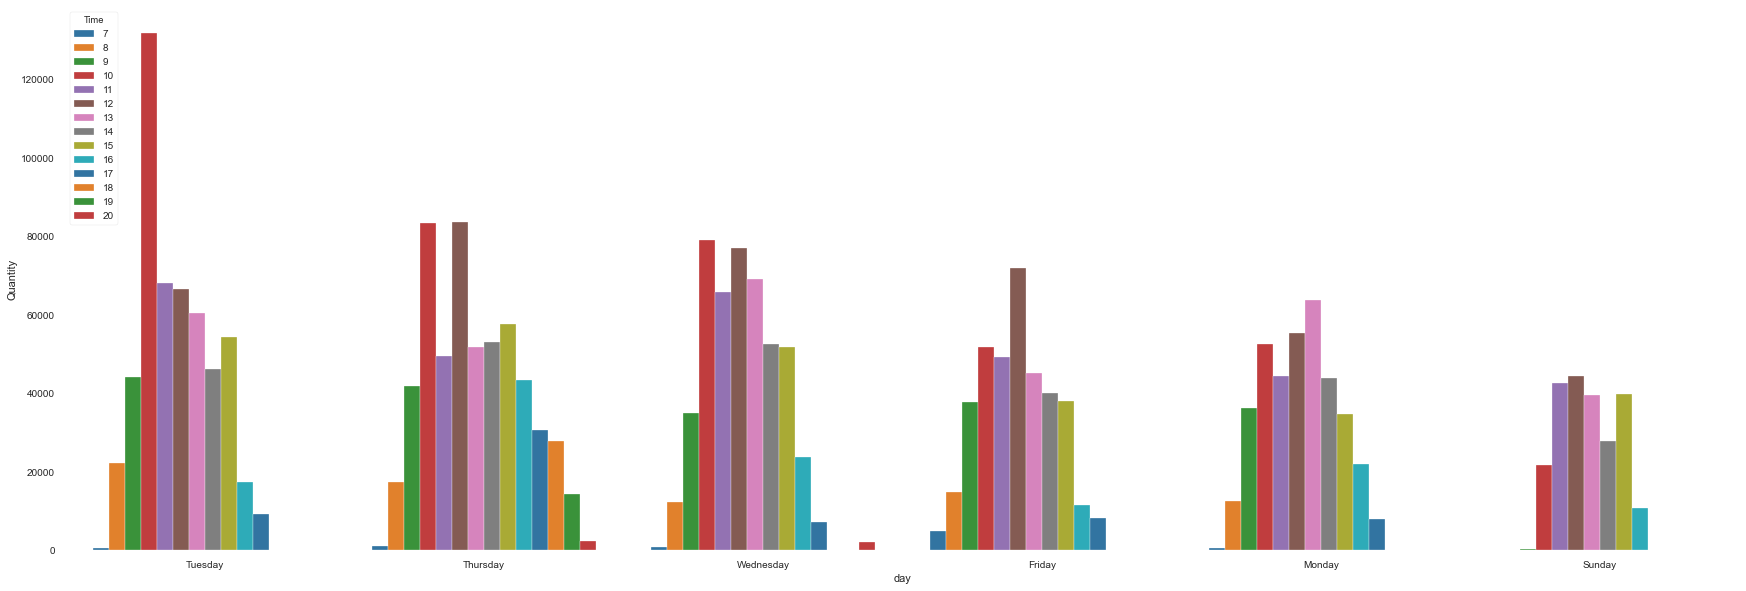

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
sns.barplot(x='day',
            y="Quantity", 
            hue='Time',
            data=df_day,
            palette='tab10')

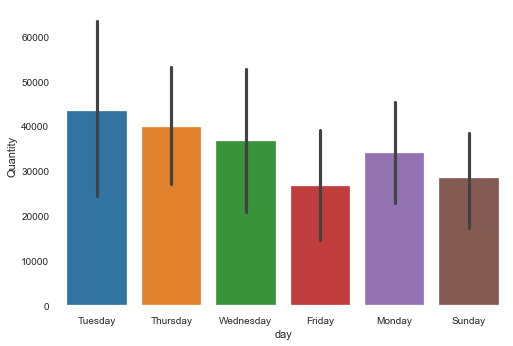

In [39]:

sns.barplot(x='day',
            y="Quantity",
            data=df_day,
            palette='tab10')

In [40]:
df_day[:20]

,day,Time,Quantity
0,Tuesday,10,131890
1,Thursday,12,83609
2,Thursday,10,83270
3,Wednesday,10,78936
4,Wednesday,12,76994
5,Friday,12,72040
6,Wednesday,13,69170
7,Tuesday,11,68063
8,Tuesday,12,66544
9,Wednesday,11,65719


In [42]:
df_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Revenue,day
0,6141,1583,144,3,2011-05-06,3.75,14056.0,35,16,11.25,Friday
1,6349,1300,3682,6,2011-05-11,1.95,13098.0,35,7,11.70,Wednesday
2,16783,2178,1939,4,2011-11-20,5.95,15044.0,35,13,23.80,Sunday
3,16971,2115,2983,1,2011-11-22,0.83,15525.0,35,12,0.83,Tuesday
4,6080,1210,2886,12,2011-05-06,1.65,13952.0,35,9,19.80,Friday
...,...,...,...,...,...,...,...,...,...,...,...
199994,10369,1347,383,24,2011-08-05,1.25,13435.0,35,11,30.00,Friday
199996,9942,2075,3500,6,2011-07-27,2.08,12397.0,3,14,12.48,Wednesday
199997,15999,856,318,2,2011-11-11,3.75,17295.0,35,10,7.50,Friday
199998,3833,441,2424,1,2011-03-11,0.85,15311.0,35,13,0.85,Friday


In [48]:
import datetime as dt
df_train['InvoiceDate'] = pd.to_datetime(df_train['InvoiceDate'])
snapshot_date = max(df_train['InvoiceDate']) + dt.timedelta(days=1)

In [49]:
# Aggregate data on a customer level
datamart = df_train.groupby(['CustomerID']).agg({
'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
'InvoiceNo': 'count',
'Revenue': 'sum'})
# Rename columns for easier interpretation
datamart.rename(columns = {'InvoiceDate': 'Recency',
'InvoiceNo': 'Frequency',
'Revenue': 'MonetaryValue'}, inplace=True)

datamart['Tenure'] = df_train.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: ((x.max() - x.min())+dt.timedelta(days=1)).days})
# Check the first rows
datamart.head(30)

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12346.0,326,1,77183.60,1
12347.0,3,84,2160.03,366
12348.0,76,13,546.04,284
12349.0,19,39,805.93,1
12350.0,311,9,176.30,1
12352.0,37,46,1261.64,261
12353.0,205,2,51.40,1
12354.0,233,31,569.82,1
12355.0,215,5,193.00,1


In [50]:
datamart.Tenure.describe()

count    4272.000000
mean      129.834972
std       131.844547
min         1.000000
25%         1.000000
50%        90.000000
75%       251.000000
max       374.000000
Name: Tenure, dtype: float64

In [51]:
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels)
datamart = datamart.assign(R = r_quartiles.values)

In [52]:
#t_labels = range(1,5)
m_labels = range(1,5)
#t_quartiles = pd.qcut(datamart['Tenure'], 4, labels = t_labels)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)
#datamart = datamart.assign(T = t_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)

In [53]:
#Split into four segments using quantiles
quantiles = datamart.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

def FScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
datamart['F'] = datamart['Frequency'].apply(FScoring, args=('Frequency',quantiles,)) 
datamart['T'] = datamart['Tenure'].apply(FScoring, args=('Tenure',quantiles,))

In [54]:
def join_rfm(x): return str(x['R']) + str(x['M']) + str(x['F']) + str(x['T'])
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score'] = datamart[['R','M','F','T']].sum(axis=1)

In [55]:
datamart

,Recency,Frequency,MonetaryValue,Tenure,R,M,F,T,RFM_Segment,RFM_Score
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1,1,1411,7.0
12347.0,3,84,2160.03,366,4,4,4,4,4444,16.0
12348.0,76,13,546.04,284,2,3,2,4,2324,11.0
12349.0,19,39,805.93,1,3,3,3,1,3331,10.0
12350.0,311,9,176.30,1,1,2,1,1,1211,5.0
...,...,...,...,...,...,...,...,...,...,...
18280.0,278,4,68.55,1,1,1,1,1,1111,4.0
18281.0,181,4,32.07,1,1,1,1,1,1111,4.0
18282.0,8,2,29.60,1,4,1,1,1,4111,7.0


In [58]:
datamart.groupby('RFM_Score').agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean', 'count'] ,
'Tenure':'mean'}).round(1)

Recency Frequency MonetaryValue       Tenure
             mean      mean          mean count   mean
RFM_Score                                             
4.0         266.4       4.1          72.8   366    1.0
5.0         179.4       6.8         115.1   327    3.3
6.0         157.9       9.9         164.8   397   10.5
7.0         108.9      12.5         426.9   366   22.8
8.0         105.7      16.0         318.0   311   52.3
9.0          82.3      20.6         397.0   291   82.8
10.0         69.4      22.9         446.3   277  125.4
11.0         67.7      31.8         550.7   339  164.3
12.0         47.0      40.9         674.6   317  172.3
13.0         35.6      52.4         921.0   324  220.6
14.0         25.6      71.0        1265.0   303  250.6
15.0         19.9     109.2        2353.3   310  292.3
16.0          7.5     199.8        5362.9   344  340.8

In [59]:
def segment_me(df):
    if df['RFM_Score'] > 14:
        return 'Platinum'
    elif (df['RFM_Score'] > 12) and (df['RFM_Score'] < 15):
        return 'Gold'
    elif (df['RFM_Score'] > 10) and (df['RFM_Score'] < 13):
        return 'Silver'
    elif (df['RFM_Score'] > 8) and (df['RFM_Score'] < 11):
        return 'Bronze'
    else:
        return '1 time customers'
datamart['General_Segment'] = datamart.apply(segment_me, axis=1)
datamart.groupby('General_Segment').agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean', 'count'],
'Tenure':'mean'}).round(1)

Recency Frequency MonetaryValue       Tenure
                    mean      mean          mean count   mean
General_Segment                                              
1 time customers   165.0       9.7         217.8  1767   17.1
Bronze              76.0      21.7         421.0   568  103.6
Gold                30.8      61.4        1087.2   627  235.1
Platinum            13.4     156.8        3936.3   654  317.8
Silver              57.7      36.2         610.6   656  168.2

In [60]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure,R,M,F,T,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1,1,1411,7.0,1 time customers
12347.0,3,84,2160.03,366,4,4,4,4,4444,16.0,Platinum
12348.0,76,13,546.04,284,2,3,2,4,2324,11.0,Silver
12349.0,19,39,805.93,1,3,3,3,1,3331,10.0,Bronze
12350.0,311,9,176.30,1,1,2,1,1,1211,5.0,1 time customers


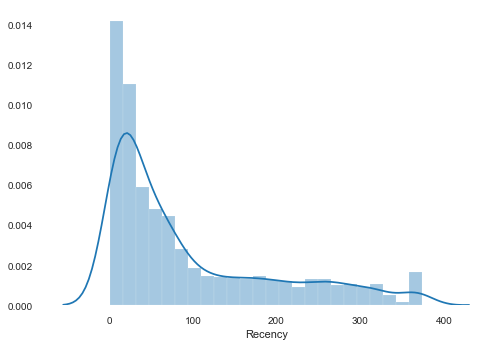

In [61]:
import seaborn as sns
x = datamart['Recency']
ax = sns.distplot(x)

In [62]:
#Descriptive Statistics (Monetary)
datamart.MonetaryValue.describe()

count      4272.000000
mean       1002.010572
std        4388.566809
min           0.000000
25%         146.515000
50%         335.530000
75%         824.312500
max      136418.780000
Name: MonetaryValue, dtype: float64

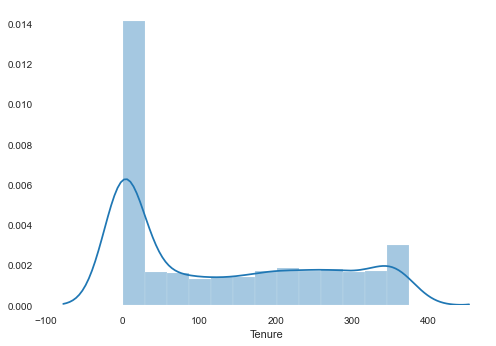

In [63]:
#Tenure distribution plot
import seaborn as sns
x = datamart['Tenure']
ax = sns.distplot(x)

In [67]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data=pd.DataFrame()
Log_Tfd_Data['Recency'] = datamart['Recency'].apply(np.sqrt).round(3)
Log_Tfd_Data['Frequency'] = datamart['Frequency'].apply(np.sqrt).round(3)
Log_Tfd_Data['Monetary'] = datamart['MonetaryValue'].apply(np.sqrt).round(3)
Log_Tfd_Data['Tenure'] = datamart['Tenure'].apply(np.sqrt).round(3)

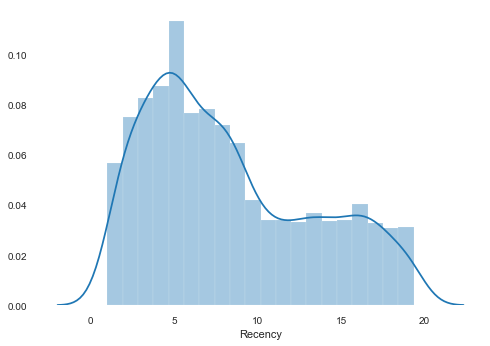

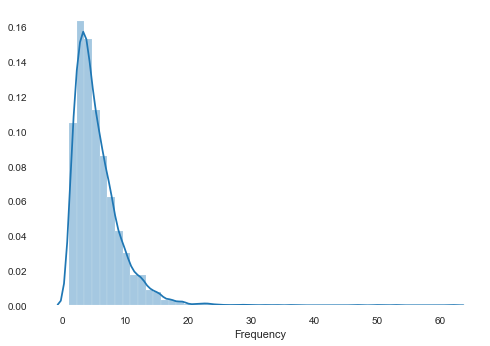

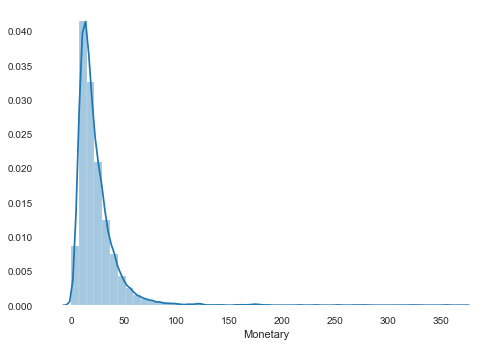

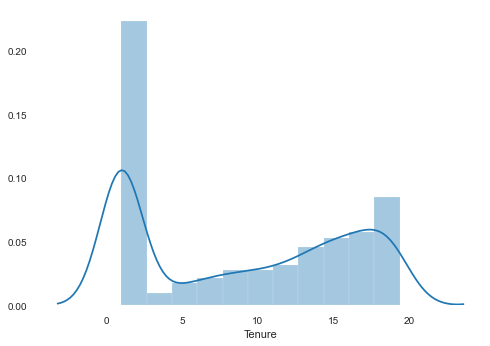

In [68]:
for i in Log_Tfd_Data.columns:
    x = Log_Tfd_Data[i]
    ax = sns.distplot(x)
    plt.show()

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Log_Tfd_Data)
datamart_normalized = scaler.transform(Log_Tfd_Data)

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0,n_init=100, max_iter=1000)

In [71]:
kmeans.fit(datamart_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [73]:
#Find the clusters for the observation given in the dataset
cluster_labels = kmeans.labels_
datamart['Cluster'] = cluster_labels
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure,R,M,F,T,RFM_Segment,RFM_Score,General_Segment,Cluster
CustomerID,,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1,1,1411,7.0,1 time customers,2
12347.0,3,84,2160.03,366,4,4,4,4,4444,16.0,Platinum,4
12348.0,76,13,546.04,284,2,3,2,4,2324,11.0,Silver,0
12349.0,19,39,805.93,1,3,3,3,1,3331,10.0,Bronze,3
12350.0,311,9,176.30,1,1,2,1,1,1211,5.0,1 time customers,1


In [74]:
datamart_rfm_k3 = datamart.assign(Cluster = cluster_labels)

In [75]:
datamart_rfm_k3.groupby(['Cluster']).agg({
'Recency': 'mean'
,
'Frequency': 'mean'
,
'MonetaryValue': ['mean'
,
'count'],
'Tenure':'mean'}).round(0)

Recency Frequency MonetaryValue       Tenure
           mean      mean          mean count   mean
Cluster                                             
0          49.0      38.0         663.0  1558  218.0
1         244.0      12.0         224.0  1086   19.0
2          22.0     852.0       47970.0    22  326.0
3          47.0      15.0         250.0  1023   12.0
4          18.0     152.0        2905.0   583  300.0

In [76]:
datamart['General_Segment'] = datamart.apply(segment_me, axis=1)
datamart.groupby('General_Segment').agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean', 'count'],
'Tenure':'mean'}).round(1)

Recency Frequency MonetaryValue       Tenure
                    mean      mean          mean count   mean
General_Segment                                              
1 time customers   165.0       9.7         217.8  1767   17.1
Bronze              76.0      21.7         421.0   568  103.6
Gold                30.8      61.4        1087.2   627  235.1
Platinum            13.4     156.8        3936.3   654  317.8
Silver              57.7      36.2         610.6   656  168.2

In [77]:
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster cent

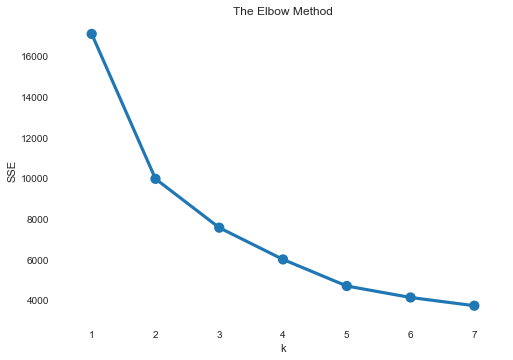

In [78]:
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [79]:
datamart_rfm_k2 = datamart.assign(Cluster = cluster_labels)

In [80]:
datamart_rfm_k2.groupby(['Cluster']).agg({
'Recency': 'mean'
,
'Frequency': 'mean'
,
'MonetaryValue': ['mean'
,
'count'],
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          49.0      38.0         663.0  1558
1         244.0      12.0         224.0  1086
2          22.0     852.0       47970.0    22
3          47.0      15.0         250.0  1023
4          18.0     152.0        2905.0   583

In [81]:
datamart_normalized = pd.DataFrame(datamart_normalized,
index=Log_Tfd_Data.index,
columns=Log_Tfd_Data.columns)
datamart_normalized['Cluster'] = datamart_rfm_k3['Cluster']

In [83]:
datamart_melt = pd.melt(datamart_normalized.reset_index(),
id_vars=['CustomerID'
,
'Cluster'],
value_vars=['Recency'
,
'Frequency'
,
'Monetary','Tenure'],
var_name='Attribute'
,
value_name='Value')

<Figure size 1080x576 with 0 Axes>

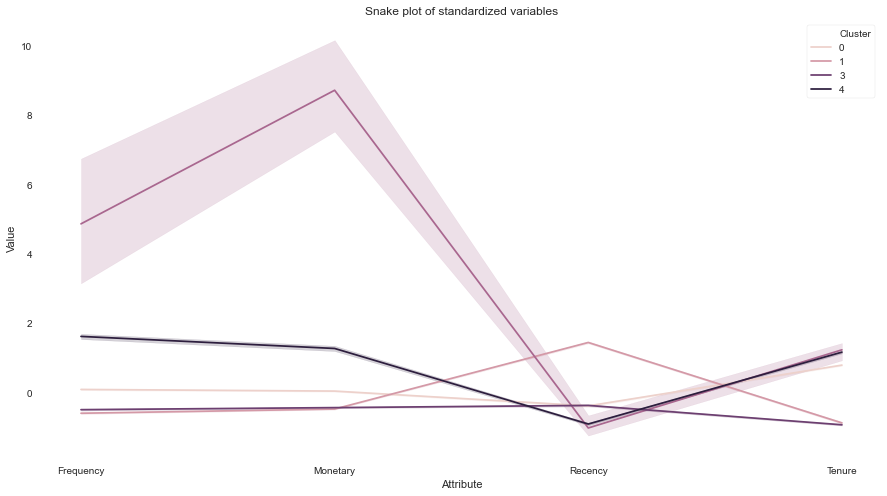

<Figure size 1080x576 with 0 Axes>

In [84]:
plt.figure(figsize = (15,8))
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute"
, y="Value"
, hue='Cluster'
, data=datamart_melt)
plt.figure(figsize = (15,8))

In [85]:
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean()
population_avg = datamart[['Recency','Frequency','MonetaryValue','Tenure']].mean()
relative_imp = cluster_avg / population_avg - 1

In [86]:
relative_imp = relative_imp[['Recency','Frequency','MonetaryValue','Tenure']]

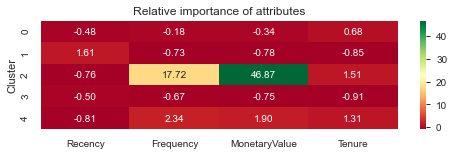

In [87]:
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f'
, cmap='RdYlGn')
plt.show()

In [88]:
datamart['General_Segment'].value_counts()

1 time customers    1767
Silver               656
Platinum             654
Gold                 627
Bronze               568
Name: General_Segment, dtype: int64

In [90]:
list = ['Recency','Frequency','Monetary','Tenure']

In [91]:
preds = kmeans.predict(datamart_normalized[list])
from sklearn.metrics import silhouette_score
score = silhouette_score(datamart_normalized[list], preds)
print(score)

0.3439894888528502


<Figure size 504x504 with 0 Axes>

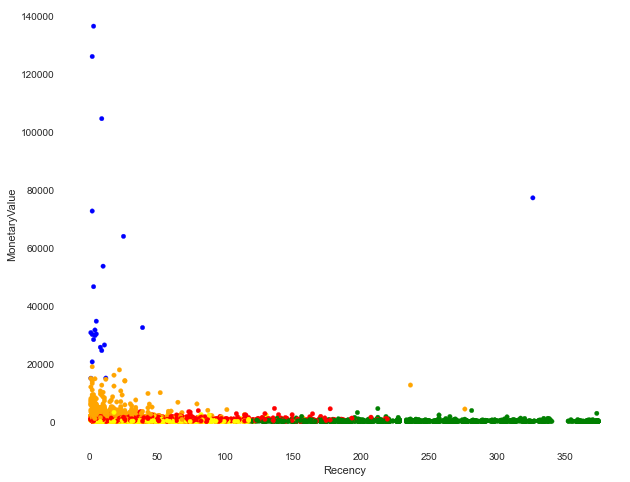

In [94]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","yellow","orange"]
datamart['Color'] = datamart['Cluster'].map(lambda p: Colors[p])
ax = datamart.plot(    
    kind="scatter", 
    x="Recency", y="MonetaryValue",
    figsize=(10,8),
    c = datamart['Color']
)

In [95]:
df_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Revenue,day
0,6141,1583,144,3,2011-05-06,3.75,14056.0,35,16,11.25,Friday
1,6349,1300,3682,6,2011-05-11,1.95,13098.0,35,7,11.70,Wednesday
2,16783,2178,1939,4,2011-11-20,5.95,15044.0,35,13,23.80,Sunday
3,16971,2115,2983,1,2011-11-22,0.83,15525.0,35,12,0.83,Tuesday
4,6080,1210,2886,12,2011-05-06,1.65,13952.0,35,9,19.80,Friday
...,...,...,...,...,...,...,...,...,...,...,...
199994,10369,1347,383,24,2011-08-05,1.25,13435.0,35,11,30.00,Friday
199996,9942,2075,3500,6,2011-07-27,2.08,12397.0,3,14,12.48,Wednesday
199997,15999,856,318,2,2011-11-11,3.75,17295.0,35,10,7.50,Friday
199998,3833,441,2424,1,2011-03-11,0.85,15311.0,35,13,0.85,Friday


In [102]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [103]:
df = pd.read_csv('tech_team_train.csv')

In [104]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [105]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [107]:
ny_df=df.set_index('InvoiceDate')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2E4622988>,
      dtype=object)

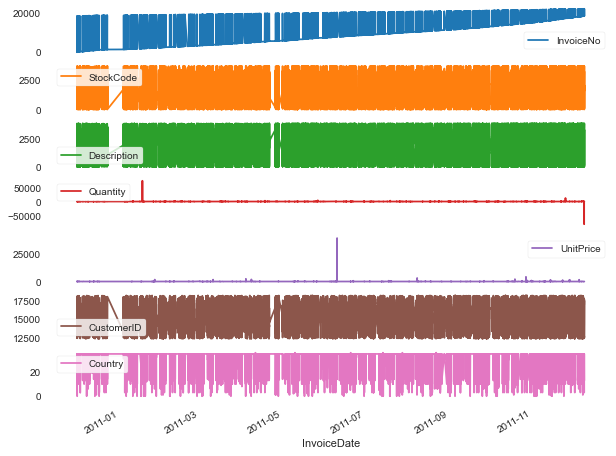

In [108]:
ny_df.plot(subplots=True)

In [109]:
ny_df.resample('M').mean()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-31,1148.189503,1476.506988,1932.732341,11.165426,3.199215,15535.086966,33.287483
2011-01-31,2410.270789,1456.539715,1982.508986,19.062762,3.340164,15129.878573,32.451718
2011-02-28,3209.348811,1464.266720,2000.157635,12.261583,3.275718,15312.780620,32.825947
2011-03-31,4402.081658,1482.000728,1962.530376,12.741259,3.467951,15206.575175,32.628205
2011-04-30,5609.461789,1503.191979,1994.805465,12.060820,3.958517,15281.184134,33.518907
2011-05-31,6893.222594,1536.347010,2033.650897,12.662271,3.267756,15216.898053,32.766869
2011-06-30,8381.590238,1551.058527,2053.144381,12.947976,6.106795,15308.324054,32.352185
2011-07-31,9747.599663,1570.449600,2060.576497,13.226376,3.159945,15308.298732,32.626787
2011-08-31,11013.285925,1580.411174,2046.026201,13.416267,3.173869,15247.412872,32.131892


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2E46223C8>,
      dtype=object)

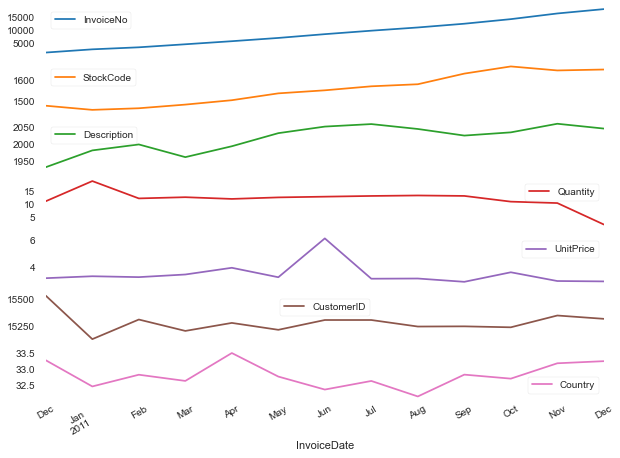

In [110]:
ny_df.resample('M').mean().plot(subplots=True)

In [111]:
ny_df_monthly=ny_df.resample('M').mean()

In [115]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
...,...,...,...,...,...,...,...,...
199995,19930,170,1953,-1,2011-05-12 10:29:00,1.65,14606.0,35
199996,9942,2075,3500,6,2011-07-27 14:21:00,2.08,12397.0,3
199997,15999,856,318,2,2011-11-11 10:49:00,3.75,17295.0,35
199998,3833,441,2424,1,2011-03-11 13:03:00,0.85,15311.0,35
